## LAB0 Simulation to Demonstrate the Type II Error and the Power Anaysis of the A/B Test 

In a A/B test hypothesis testing situation in order to understand the power analysis, it is important to understand three related concepts: significance level, Type I/II errors and the effect size.

In hypothesis testing, significance level (often denoted as Greek letter alpha) is the probability of rejecting the null hypothesis (H0), which it is usually conventional wisdom. A metric closely related to the significance level is the p-value, which is the probability of obtaining a result at least as extreme (a result against the null hypothesis), even if the H0 was true. What does that mean in practice? In case of drawing a random sample from a population, 

It is always possible that the observed extreme/ unlikely outcome would have occurred only due to sampling error.
The result of an experiment (or for example a linear regression coefficient) is statistically significant when the associated p-value is smaller than the chosen probability. The significance level, meaning the probability allowed in the experiment that wrongly rejects the conventional wisdom which is true, should be specified before setting up the study and depends on the field of research/business needs. 

The second concept worth mentioning is the types of errors we can commit while statistically testing a hypothesis. When we reject a true H0 we are talking about a Type I error (false positive). This is also another error connected to the significance level (mentioned above). The other case occurs when we fail to reject a false H0, which is considered to be a Type II error (false negative). 

The last concept to consider it the effect size, related to the population which is the quantified magnitude of Type I and Type II errors present in the sample



### Statistical power

The key concepts related to power analysis, statistical power, of a hypothesis test is simply the probability that the given test correctly rejects the null hypothesis (which means the somehow as accepting the H1), when the alternative is in fact true.

Higher statistical power of an experiment means lower probability of committing a Type II error. It also means higher probability of detecting an effect when there is an effect to detect (true positive). This can be illustrated by the following formula:

Power = Pr(reject H0 | H1 is true) = 1 - Pr(fail to reject H0 | H0 is false) = 1 - Type II Error

In practice, results from experiments with too little power will lead to wrong conclusions, which in turn will affect the decision-making process. That is why only results with an acceptable level of power should be taken into consideration. It is quite common to design experiments with power level of 80%, which translates to a 20% probability of committing a Type II error.

The idea of power analysis can be brought down to the following: by having defining three out of four metrics, we estimate the missing one. This comes in handy in two ways:

In designing an experiment, we can assume what "level of significance" (alpha), "power" (1- beta) and "effect size" is acceptable to us and — as a result — estimate "how big a sample" we need to gather for such an experiment to yield valid results or when validate an experiment, one can see if, given the used sample size, effect size and significance level, what is the probability of the level of a Type II error is acceptable from the business perspective.


### Programme for the Power Analysis

In [1]:
# Power vs Number of Observation (A clarity rather than speed of execution)

import numpy as np

import scipy.stats

n_per_group = 30

# effect size = 0.8
group_means = [0.0, 0.8]
group_sigmas = [1.0, 1.0]

n_groups = len(group_means)

# number of simulations
n_sims = 1000

# store the p value for each simulation
sim_p = np.empty(n_sims)
sim_p.fill(np.nan)

for i_sim in range(n_sims):

    data = np.empty([n_per_group, n_groups])
    data.fill(np.nan)

    # simulate the data for this 'experiment'
    for i_group in range(n_groups):

        data[:, i_group] = np.random.normal(
            loc=group_means[i_group],
            scale=group_sigmas[i_group],
            size=n_per_group
        )

    result = scipy.stats.ttest_ind(data[:, 0], data[:, 1])

    sim_p[i_sim] = result[1]

# number of simulations where the null was rejected
n_rej = np.sum(sim_p < 0.05)

prop_rej = n_rej / float(n_sims)

print("Power: ", prop_rej)

Power:  0.865


In [2]:
# power vs. number of observations (A quick execution)

import numpy as np

import scipy.stats

n_per_group = 30

# effect size = 0.8
group_means = [0.0, 0.8]
group_sigmas = [1.0, 1.0]

n_groups = len(group_means)

# number of simulations
n_sims = 1000000

data = np.empty([n_sims, n_per_group, n_groups])
data.fill(np.nan)

for i_group in range(n_groups):

    data[:, :, i_group] = np.random.normal(
        loc=group_means[i_group],
        scale=group_sigmas[i_group],
        size=[n_sims, n_per_group]
    )

result = scipy.stats.ttest_ind(
    data[:, :, 0],
    data[:, :, 1],
    axis=1
)

sim_p = result[1]

# number of simulations where the null was rejected
n_rej = np.sum(sim_p < 0.05)

prop_rej = n_rej / float(n_sims)

print ("Power: ", prop_rej)

Power:  0.861552


In [11]:
import numpy as np

import scipy.stats

# start at 10 participants
n_per_group = 10

# effect size = 0.8
group_means = [0.0, 0.8]
group_sigmas = [1.0, 1.0]

n_groups = len(group_means)

# number of simulations
n_sims = 1000

# power level that we would like to reach
desired_power = 0.99

# initialise the power for the current sample size to a small value
current_power = 0.0

# keep iterating until desired power is obtained
while current_power < desired_power:

    data = np.empty([n_sims, n_per_group, n_groups])
    data.fill(np.nan)

    for i_group in range(n_groups):

        data[:, :, i_group] = np.random.normal(
            loc=group_means[i_group],
            scale=group_sigmas[i_group],
            size=[n_sims, n_per_group]
        )

    result = scipy.stats.ttest_ind(
        data[:, :, 0],
        data[:, :, 1],
        axis=1
    )

    sim_p = result[1]

    # number of simulations where the null was rejected
    n_rej = np.sum(sim_p < 0.05)

    prop_rej = n_rej / float(n_sims)

    current_power = prop_rej

    print ("With {n:d} samples per group, power = {p:.3f}".format(
        n=n_per_group,
        p=current_power))

    # increase the number of samples by one for the next iteration of the loop
    n_per_group += 1

With 10 samples per group, power = 0.370
With 11 samples per group, power = 0.422
With 12 samples per group, power = 0.455
With 13 samples per group, power = 0.472
With 14 samples per group, power = 0.489
With 15 samples per group, power = 0.552
With 16 samples per group, power = 0.582
With 17 samples per group, power = 0.631
With 18 samples per group, power = 0.647
With 19 samples per group, power = 0.682
With 20 samples per group, power = 0.694
With 21 samples per group, power = 0.707
With 22 samples per group, power = 0.737
With 23 samples per group, power = 0.764
With 24 samples per group, power = 0.785
With 25 samples per group, power = 0.785
With 26 samples per group, power = 0.788
With 27 samples per group, power = 0.818
With 28 samples per group, power = 0.840
With 29 samples per group, power = 0.858
With 30 samples per group, power = 0.866
With 31 samples per group, power = 0.862
With 32 samples per group, power = 0.895
With 33 samples per group, power = 0.884
With 34 samples 

In [23]:
# The Sample size needed to meet the parameters of the experiment for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


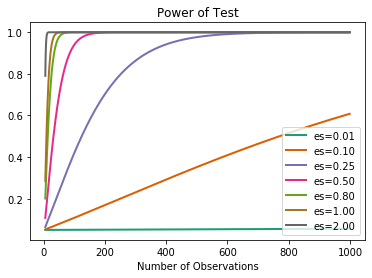

In [34]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_sizes = array([0.01, 0.1, 0.25, 0.5, 0.8, 1, 2])
sample_sizes = array(range(5, 1000))

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

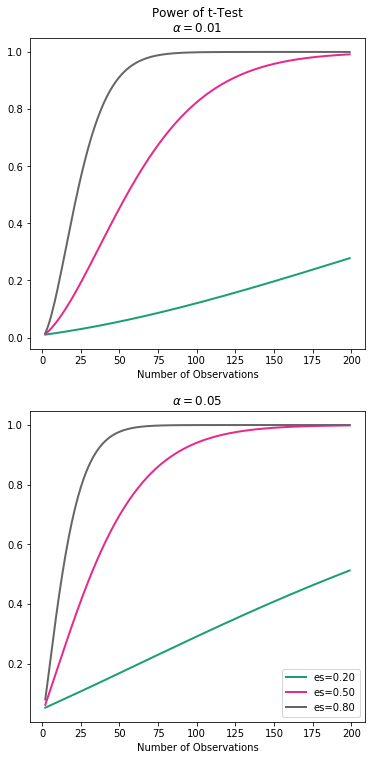

In [31]:
# power vs. number of observations for different significant level

fig = pyplot.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2.5)